In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("teleCust1000t.csv")

In [3]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [4]:
X=df.iloc[:,:-1].values
#X = df[['tenure','age', 'marital', 'income', 'ed', 'employ', 'gender']] .values
y=df.iloc[:,11].values

In [5]:
X1=np.array(X)
y1=np.array(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

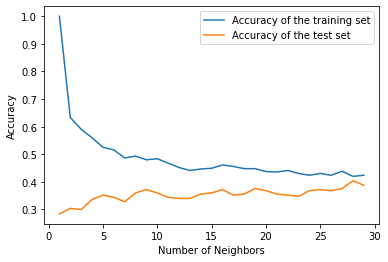

In [8]:
training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 30
neighbors_setting = range(1,30)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

In [9]:
#WE CAN SEE, AT K=29, WE GET BEST ACCURACY
knn=KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(knn.score(X_test,y_test))

0.388


In [10]:
out1=  pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred.flatten()})
print(out1)

     Actual  Predicted
0         4          3
1         2          3
2         3          3
3         3          2
4         4          3
..      ...        ...
245       2          4
246       3          2
247       1          1
248       2          1
249       1          1

[250 rows x 2 columns]


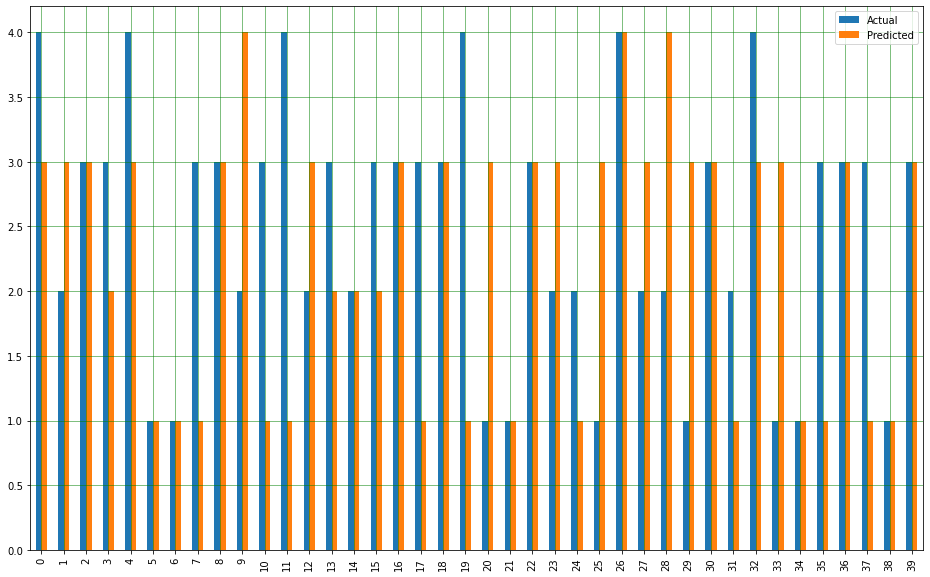

In [11]:
out1.head(40).plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':',linewidth='0.5', color='black')
plt.show()

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,pred)
print("Accuracy:",result2)

Confusion Matrix:
[[44  3 13  5]
 [12 13 15  7]
 [27 12 30  4]
 [28 12 15 10]]
Classification Report:
              precision    recall  f1-score   support

           1       0.40      0.68      0.50        65
           2       0.33      0.28      0.30        47
           3       0.41      0.41      0.41        73
           4       0.38      0.15      0.22        65

    accuracy                           0.39       250
   macro avg       0.38      0.38      0.36       250
weighted avg       0.38      0.39      0.36       250

Accuracy: 0.388
